In [ ]:
# https://vonum.medium.com/forecasting-multiple-dependent-variables-with-facebook-prophet-61e12302d50b
# https://nbviewer.org/github/nicolasfauchereau/Auckland_Cycling/blob/master/notebooks/Auckland_cycling_and_weather.ipynb
# https://pypi.org/project/multi-prophet/

In [16]:
import numpy as np

In [26]:
from multi_prophet_master import multi_prophet

In [18]:
#python -m pip install prophet

SyntaxError: invalid syntax (541650080.py, line 1)

In [22]:
import pandas as pd
from prophet import Prophet# Load the data
# from multi_prophet import MultiProphet


# from google.colab import files
# uploaded = files.upload()

df_mercado_trends = pd.read_csv(
    './Resources/google_hourly_search_trends.csv',
    index_col='Date',
    infer_datetime_format=True,
    parse_dates=True
)

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [23]:


# from google.colab import files
# uploaded = files.upload()


df_mercado_stock = pd.read_csv(
    './Resources/mercado_stock_price.csv',
    index_col='date',
    infer_datetime_format=True,
    parse_dates=True)
df_mercado_stock.head()# Build and fit a Prophet model

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


In [33]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data

mercado_stock_trends_df = pd.concat([df_mercado_trends,df_mercado_stock],axis=1).dropna()
mercado_stock_trends_df['stock_trends'] = mercado_stock_trends_df['close'].pct_change()
mercado_stock_trends_df.dropna(inplace=True)
# View the first and last five rows of the DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())


,Search Trends,close,stock_trends
2016-06-01 10:00:00,12.0,136.63,0.010876
2016-06-01 11:00:00,22.0,136.56,-0.000512
2016-06-01 12:00:00,33.0,136.42,-0.001025
2016-06-01 13:00:00,40.0,136.10,-0.002346
2016-06-01 14:00:00,45.0,137.03,0.006833


,Search Trends,close,stock_trends
2020-07-31 11:00:00,20.0,1105.780,0.006380
2020-07-31 12:00:00,32.0,1087.925,-0.016147
2020-07-31 13:00:00,41.0,1095.800,0.007239
2020-07-31 14:00:00,47.0,1110.650,0.013552
2020-07-31 15:00:00,53.0,1122.510,0.010678


In [34]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
mercado_prophet_df = mercado_stock_trends_df.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
mercado_prophet_df.columns=['ds','y','y1','stock_trends']

# Drop an NaN values from the prophet_df DataFrame
mercado_prophet_df = mercado_prophet_df.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(mercado_prophet_df.head())
display(mercado_prophet_df.tail())


,ds,y,y1,stock_trends
0,2016-06-01 10:00:00,12.0,136.63,0.010876
1,2016-06-01 11:00:00,22.0,136.56,-0.000512
2,2016-06-01 12:00:00,33.0,136.42,-0.001025
3,2016-06-01 13:00:00,40.0,136.10,-0.002346
4,2016-06-01 14:00:00,45.0,137.03,0.006833


,ds,y,y1,stock_trends
7061,2020-07-31 11:00:00,20.0,1105.780,0.006380
7062,2020-07-31 12:00:00,32.0,1087.925,-0.016147
7063,2020-07-31 13:00:00,41.0,1095.800,0.007239
7064,2020-07-31 14:00:00,47.0,1110.650,0.013552
7065,2020-07-31 15:00:00,53.0,1122.510,0.010678


In [60]:
#from multi_prophet import MultiProphet
# Define our model with two dependent variables and train the model
m = multi_prophet.MultiProphet(columns=["y", "y1","stock_trends"], growth="linear")

m.add_regressor("stock_trends", mode='multiplicative')
m

In [62]:

#m.fit(mercado_prophet_df)# Make predictions for the next 10 periods
future = m.make_future_dataframe(periods=2000, freq='H')# Make predictions and print them

# Add regressors
future = m.make_future_dataframe(periods=2000, freq='H')# Make predictions and print them
stock_trends_future=mercado_prophet_df
future['stock_trends']=stock_trends_future["stock_trends"]
future.ffill(inplace=True)

forecast = m.predict(future)

print(forecast["y"][['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
print(forecast["y1"][['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

                      ds       yhat  yhat_lower  yhat_upper
9061 2020-10-22 19:00:00  59.503849   54.765420   63.925299
9062 2020-10-22 20:00:00  63.323169   58.486692   67.920671
9063 2020-10-22 21:00:00  64.406259   59.614118   69.405673
9064 2020-10-22 22:00:00  57.933816   53.178076   63.203577
9065 2020-10-22 23:00:00  41.370021   36.516484   45.826176
                      ds         yhat   yhat_lower   yhat_upper
9061 2020-10-22 19:00:00  1196.123215  1008.908397  1380.952932
9062 2020-10-22 20:00:00  1316.410686  1139.044980  1496.068574
9063 2020-10-22 21:00:00  1494.065227  1314.042378  1675.673359
9064 2020-10-22 22:00:00  1690.000311  1503.589400  1875.176102
9065 2020-10-22 23:00:00  1842.951478  1658.384494  2027.540828


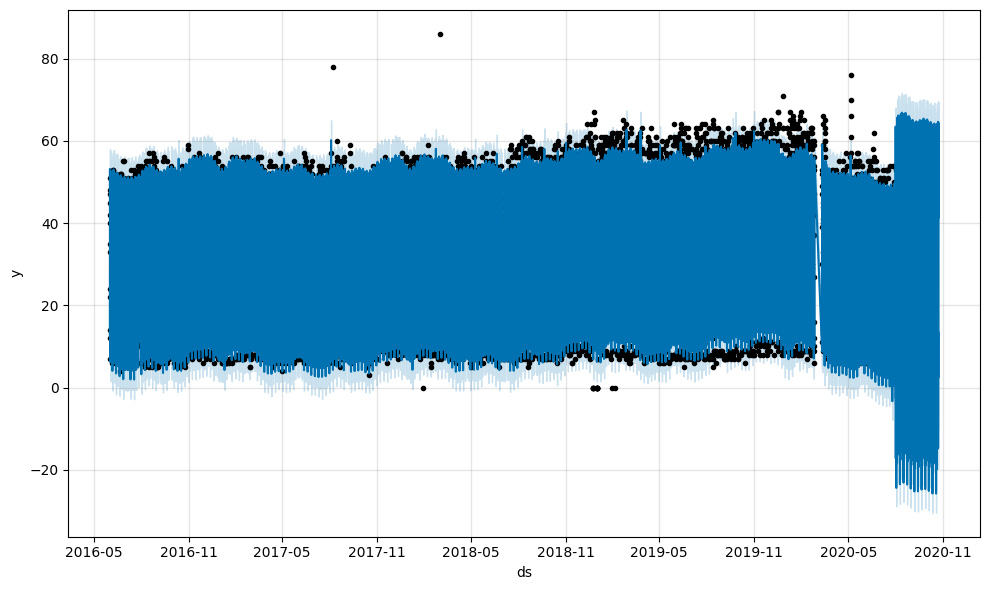

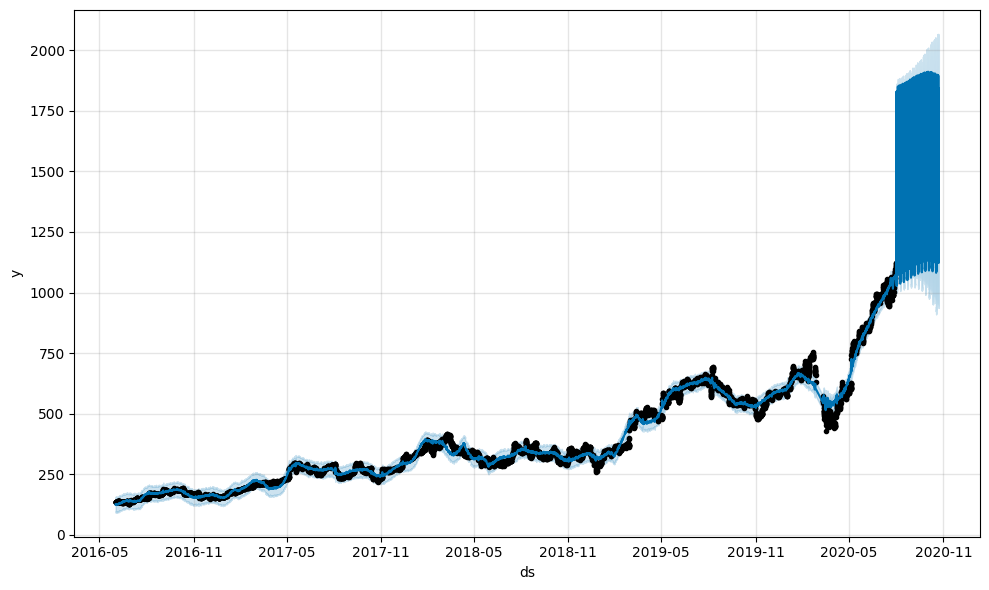

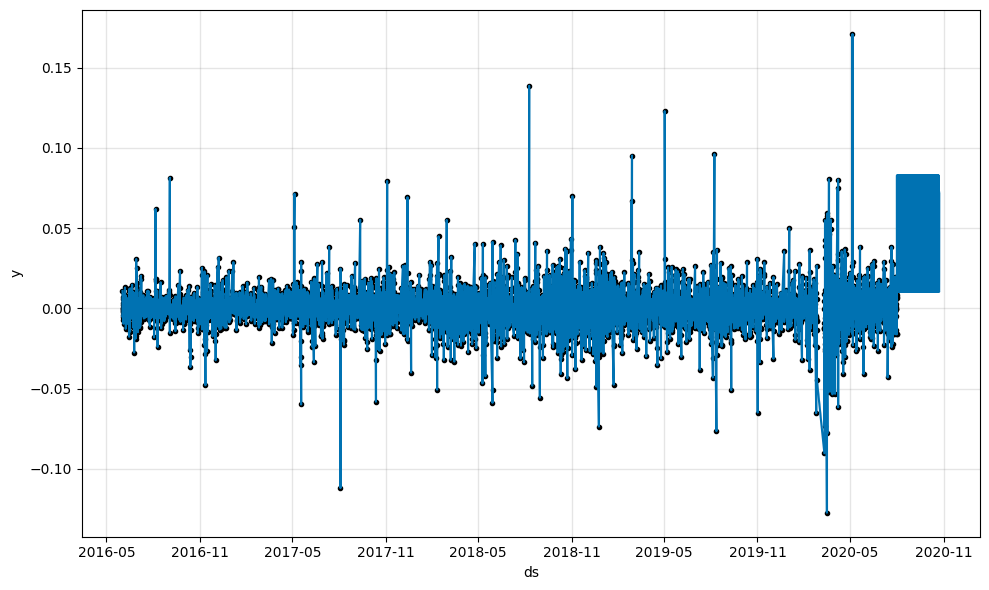

In [63]:
plots=m.plot(forecast)

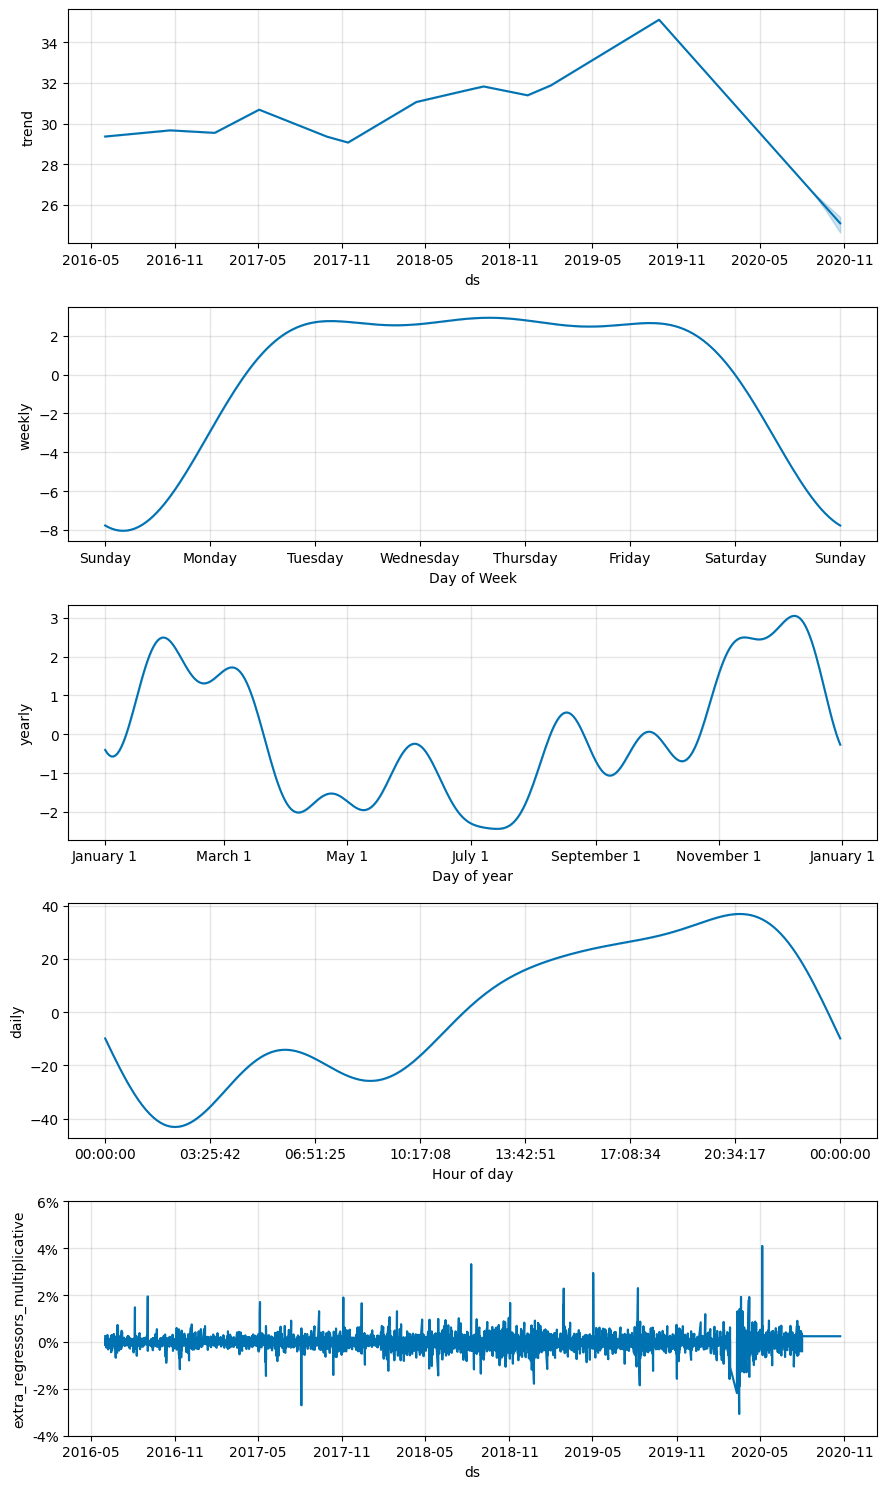

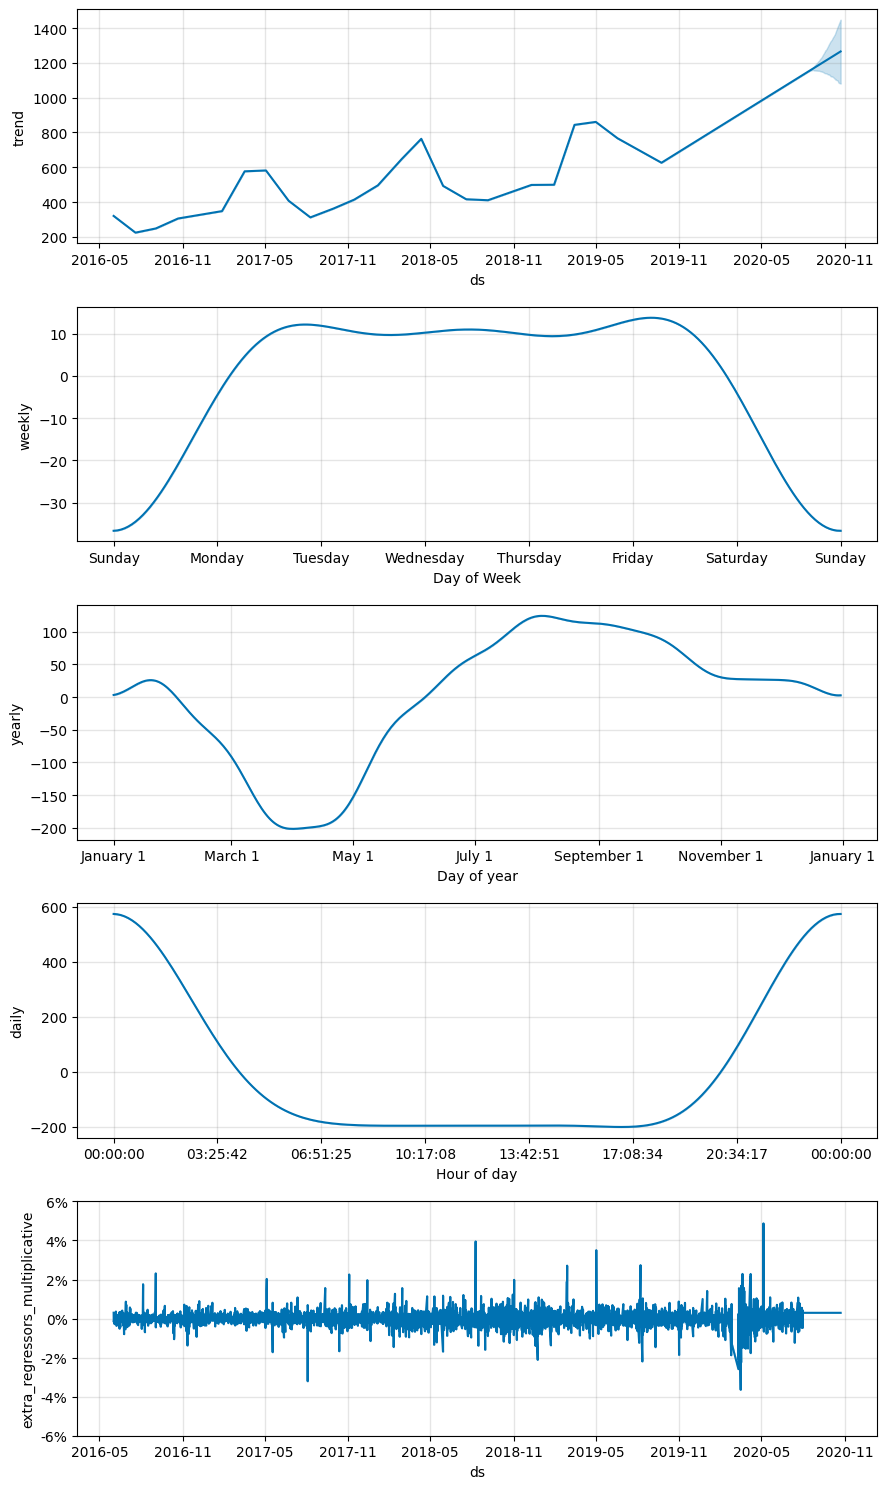

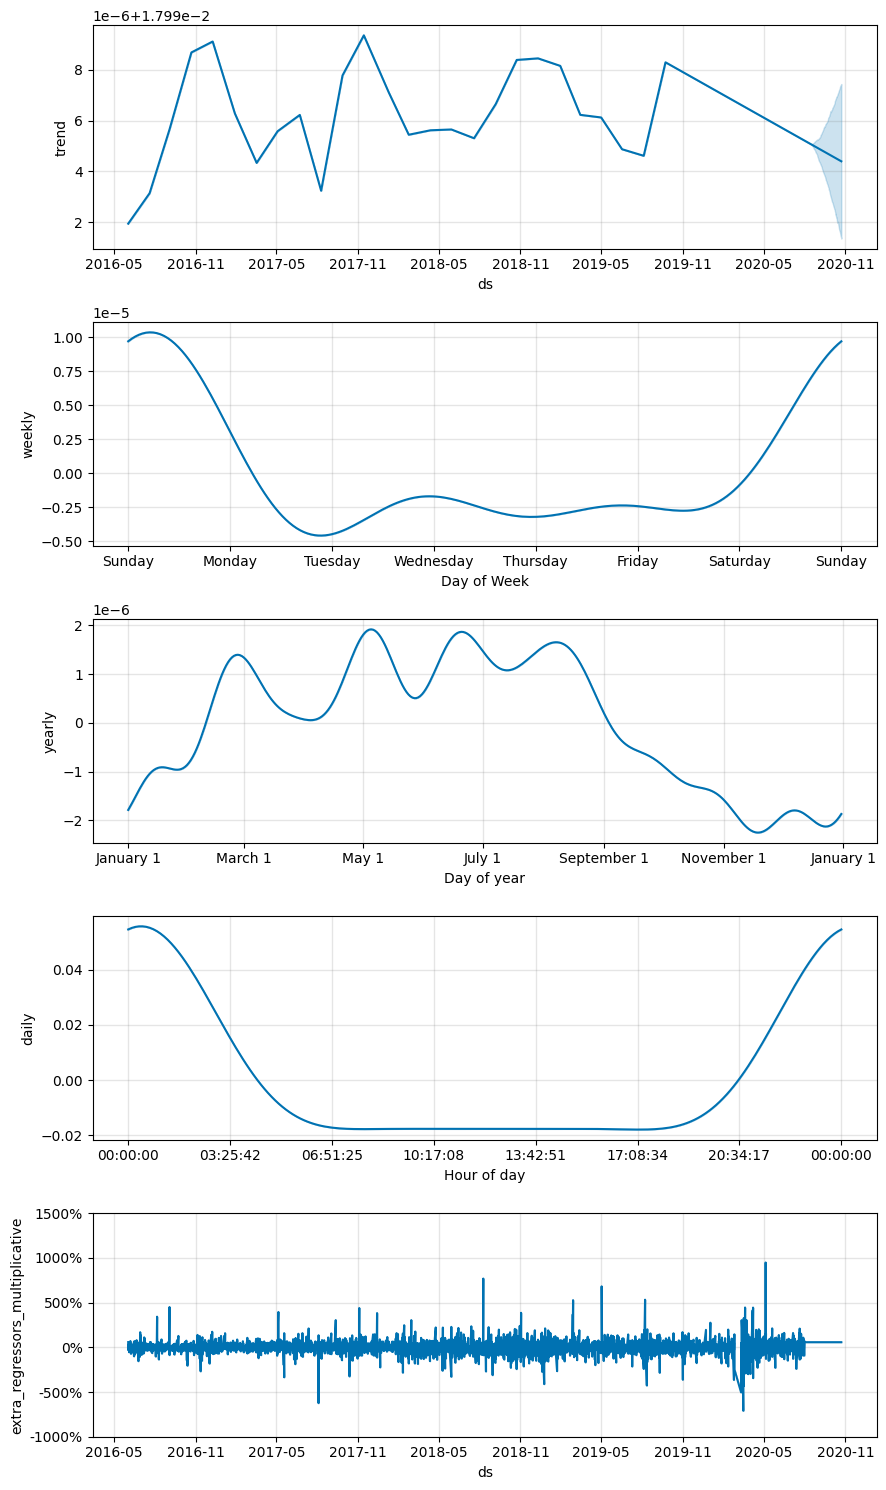

In [64]:


f = m.plot_components(forecast)



In [ ]:
# Define our configuration
config = {
    "y": {"weekly_seasonality": True, 
          "seasonality_mode": "additive"},
    "y1": {"yearly_seasonality": True, 
           "seasonality_mode": "multiplicative"}
}# Create a model and plot our predictions
m = multi_prophet.MultiProphet(columns=["y", "y1"], config=config)
m.fit(df)future_df = m.make_future_dataframe(periods=10)
forecast = m.predict(future_df)plots = m.plot(forecast)

In [5]:
# m = Prophet()
# m.fit(mercado_prophet_df)# Create a data frame for predictions
# future = m.make_future_dataframe(periods=2000, freq='H')# Make predictions and print them
# forecast = m.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfp9mw8uf/ypdbejpq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfp9mw8uf/2clw7e1m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48674', 'data', 'file=/tmp/tmpfp9mw8uf/ypdbejpq.json', 'init=/tmp/tmpfp9mw8uf/2clw7e1m.json', 'output', 'file=/tmp/tmpfp9mw8uf/prophet_modelc7x1jmbm/prophet_model-20240131180817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:08:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:08:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
39101,2020-11-30 04:00:00,39.781638,31.502132,48.307132
39102,2020-11-30 05:00:00,24.310504,16.359960,32.807551
39103,2020-11-30 06:00:00,12.344836,3.165122,20.756832
39104,2020-11-30 07:00:00,5.072692,-3.768031,12.804183
39105,2020-11-30 08:00:00,2.877820,-6.099024,12.035666


### Diagnostics

In [ ]:
# #https://facebook.github.io/prophet/docs/diagnostics.html
# from prophet.diagnostics import performance_metrics
# from prophet.diagnostics import cross_validation
# df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

# df_p = performance_metrics(df_cv)
# df_p.head()

### Coefficients


In [ ]:
from multi_prophet_master import multi_prophet

In [79]:
#https://github.com/facebook/prophet/issues/848
multi_prophet.regressor_coefficients(m)

AttributeError: module 'multi_prophet_master.multi_prophet' has no attribute 'regressor_coefficients'

In [71]:
from prophet.utilities import regressor_coefficients
beta = regressor_coefficients(m)

AttributeError: 'MultiProphet' object has no attribute 'extra_regressors'

In [67]:
m.params.beta

AttributeError: 'MultiProphet' object has no attribute 'params'